In [ ]:
!pip install ipython-autotime
%load_ext autotime

In [ ]:
!pip install mplfinance

time: 2.43 s


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
time: 4.7 ms


In [ ]:
%cd /gdrive/My Drive/KISTI_STOCK/DATA

/gdrive/My Drive/KISTI_STOCK/DATA
time: 5.06 ms


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import re
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf

time: 358 ms


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def data_info(df) :
    print(f'shape : {df.shape}')
    print(f'dtypes : {df.dtypes}')
    display(df.head())

time: 2.68 ms


In [ ]:
stock = pd.read_csv("SSE2015-01-01_2020-06-30.csv")
phlx = pd.read_csv("Philadelphia Semiconductor Index.csv")

data_info(stock)
data_info(phlx)

shape : (1347, 7)
dtypes : Date       object
Open        int64
High        int64
Low         int64
Close       int64
Volume      int64
Change    float64
dtype: object


,Date,Open,High,Low,Close,Volume,Change
0,2015-01-02,26799,26799,26540,26600,175499,0.002261
1,2015-01-05,26720,26720,26260,26660,202790,0.002256
2,2015-01-06,26300,26340,25760,25900,304710,-0.028507
3,2015-01-07,25880,26220,25640,26140,286455,0.009266
4,2015-01-08,26780,26780,26199,26280,289552,0.005356


shape : (1383, 7)
dtypes : 날짜      object
종가      object
오픈      object
고가      object
저가      object
거래량     object
변동 %    object
dtype: object


,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2020년 06월 30일,"1,996.44","1,954.54","2,002.08","1,953.22",-,2.70%
1,2020년 06월 29일,"1,943.90","1,924.80","1,944.64","1,899.80",-,1.14%
2,2020년 06월 26일,"1,921.92","1,959.50","1,964.01","1,917.83",-,-2.00%
3,2020년 06월 25일,"1,961.05","1,941.59","1,963.72","1,914.30",-,0.86%
4,2020년 06월 24일,"1,944.30","1,976.63","1,988.23","1,930.69",-,-2.18%


time: 67.7 ms


In [ ]:
phlx.columns = ['Date', 'Close', 'Open', 'High', 'Low', 'Volume', 'Change']

time: 1.94 ms


In [ ]:
data_info(phlx)

shape : (1383, 7)
dtypes : Date      object
Close     object
Open      object
High      object
Low       object
Volume    object
Change    object
dtype: object


,Date,Close,Open,High,Low,Volume,Change
0,2020년 06월 30일,"1,996.44","1,954.54","2,002.08","1,953.22",-,2.70%
1,2020년 06월 29일,"1,943.90","1,924.80","1,944.64","1,899.80",-,1.14%
2,2020년 06월 26일,"1,921.92","1,959.50","1,964.01","1,917.83",-,-2.00%
3,2020년 06월 25일,"1,961.05","1,941.59","1,963.72","1,914.30",-,0.86%
4,2020년 06월 24일,"1,944.30","1,976.63","1,988.23","1,930.69",-,-2.18%


time: 28 ms


In [ ]:
def process_Date(df):
    
    regex_pat = re.compile(r'[가-힣] ')
    df['Date'] = df.Date.replace(regex_pat, '-')
    regex_pat = re.compile(r'[가-힣]')
    df['Date'] = df.Date.replace(regex_pat, '')
    
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    return df

time: 5.51 ms


In [ ]:
stock = process_Date(stock)
phlx = process_Date(phlx)

data_info(stock)
data_info(phlx)

shape : (1347, 7)
dtypes : Date      datetime64[ns]
Open               int64
High               int64
Low                int64
Close              int64
Volume             int64
Change           float64
dtype: object


,Date,Open,High,Low,Close,Volume,Change
0,2015-01-02,26799,26799,26540,26600,175499,0.002261
1,2015-01-05,26720,26720,26260,26660,202790,0.002256
2,2015-01-06,26300,26340,25760,25900,304710,-0.028507
3,2015-01-07,25880,26220,25640,26140,286455,0.009266
4,2015-01-08,26780,26780,26199,26280,289552,0.005356


shape : (1383, 7)
dtypes : Date      datetime64[ns]
Close             object
Open              object
High              object
Low               object
Volume            object
Change            object
dtype: object


,Date,Close,Open,High,Low,Volume,Change
0,2020-06-30,"1,996.44","1,954.54","2,002.08","1,953.22",-,2.70%
1,2020-06-29,"1,943.90","1,924.80","1,944.64","1,899.80",-,1.14%
2,2020-06-26,"1,921.92","1,959.50","1,964.01","1,917.83",-,-2.00%
3,2020-06-25,"1,961.05","1,941.59","1,963.72","1,914.30",-,0.86%
4,2020-06-24,"1,944.30","1,976.63","1,988.23","1,930.69",-,-2.18%


time: 60.2 ms


In [ ]:
phlx.sort_values(by='Date', inplace=True)
phlx.head()

,Date,Close,Open,High,Low,Volume,Change
1382,2015-01-02,686.73,690.28,694.03,680.28,-,-0.02%
1381,2015-01-05,673.59,683.57,684.84,673.43,-,-1.91%
1380,2015-01-06,658.83,675.12,675.14,656.37,-,-2.19%
1379,2015-01-07,665.27,660.42,668.22,658.75,-,0.98%
1378,2015-01-08,684.65,671.81,686.20,671.81,-,2.91%


time: 27.1 ms


In [ ]:
phlx['Close'] = phlx['Close'].str.replace(",", "")
phlx['Open'] = phlx['Open'].str.replace(",", "")
phlx['High'] = phlx['High'].str.replace(",", "")
phlx['Low'] = phlx['Low'].str.replace(",", "")

time: 12.4 ms


In [ ]:
phlx = phlx.astype({'Close' : 'float',
                    'Open' : 'float',
                    'High' : 'float',
                    'Low' : 'float'})

time: 7.73 ms


In [ ]:
setidx_stock = stock.set_index('Date')
setidx_phlx = phlx.set_index('Date')

data_info(setidx_stock)
data_info(setidx_phlx)

shape : (1347, 6)
dtypes : Open        int64
High        int64
Low         int64
Close       int64
Volume      int64
Change    float64
dtype: object


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2015-01-02,26799,26799,26540,26600,175499,0.002261
2015-01-05,26720,26720,26260,26660,202790,0.002256
2015-01-06,26300,26340,25760,25900,304710,-0.028507
2015-01-07,25880,26220,25640,26140,286455,0.009266
2015-01-08,26780,26780,26199,26280,289552,0.005356


shape : (1383, 6)
dtypes : Close     float64
Open      float64
High      float64
Low       float64
Volume     object
Change     object
dtype: object


,Close,Open,High,Low,Volume,Change
Date,,,,,,
2015-01-02,686.73,690.28,694.03,680.28,-,-0.02%
2015-01-05,673.59,683.57,684.84,673.43,-,-1.91%
2015-01-06,658.83,675.12,675.14,656.37,-,-2.19%
2015-01-07,665.27,660.42,668.22,658.75,-,0.98%
2015-01-08,684.65,671.81,686.20,671.81,-,2.91%


time: 44 ms


In [ ]:
data_info(setidx_stock)
data_info(setidx_phlx)

shape : (1347, 6)
dtypes : Open        int64
High        int64
Low         int64
Close       int64
Volume      int64
Change    float64
dtype: object


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2015-01-02,26799,26799,26540,26600,175499,0.002261
2015-01-05,26720,26720,26260,26660,202790,0.002256
2015-01-06,26300,26340,25760,25900,304710,-0.028507
2015-01-07,25880,26220,25640,26140,286455,0.009266
2015-01-08,26780,26780,26199,26280,289552,0.005356


shape : (1383, 6)
dtypes : Close     float64
Open      float64
High      float64
Low       float64
Volume     object
Change     object
dtype: object


,Close,Open,High,Low,Volume,Change
Date,,,,,,
2015-01-02,686.73,690.28,694.03,680.28,-,-0.02%
2015-01-05,673.59,683.57,684.84,673.43,-,-1.91%
2015-01-06,658.83,675.12,675.14,656.37,-,-2.19%
2015-01-07,665.27,660.42,668.22,658.75,-,0.98%
2015-01-08,684.65,671.81,686.20,671.81,-,2.91%


time: 42.4 ms


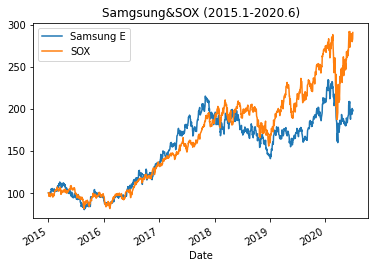

time: 199 ms


In [ ]:
scaling_stock = setidx_stock['Close']/setidx_stock['Close'].iloc[0] *100
scaling_phlx = setidx_phlx['Close']/setidx_phlx['Close'].iloc[0] *100

scaling_stock.plot()
scaling_phlx.plot()
plt.title('Samgsung&SOX (2015.1-2020.6)')
plt.legend(['Samsung E', 'SOX'])
plt.show()

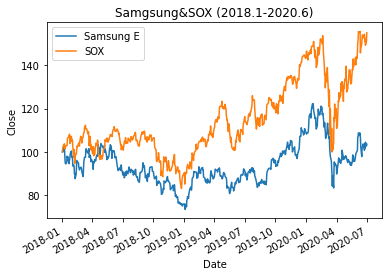

time: 232 ms


In [ ]:
scaling_stock = setidx_stock[setidx_stock.index.year >= 2018]['Close']/setidx_stock[setidx_stock.index.year >= 2018]['Close'].iloc[0] *100

scaling_phlx = setidx_phlx[setidx_phlx.index.year >= 2018]['Close']/setidx_phlx[setidx_phlx.index.year >= 2018]['Close'].iloc[0] *100

scaling_stock.plot()
scaling_phlx.plot()
plt.title('Samgsung&SOX (2018.1-2020.6)')
plt.ylabel("Close")
plt.legend(['Samsung E', 'SOX'])
plt.show()

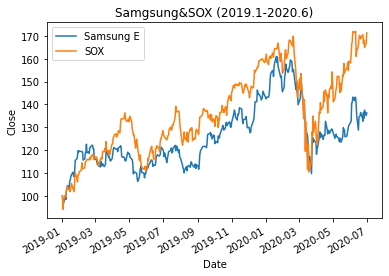

time: 220 ms


In [ ]:
scaling_stock = setidx_stock[setidx_stock.index.year >= 2019]['Close']/setidx_stock[setidx_stock.index.year >= 2019]['Close'].iloc[0] *100

scaling_phlx = setidx_phlx[setidx_phlx.index.year >= 2019]['Close']/setidx_phlx[setidx_phlx.index.year >= 2019]['Close'].iloc[0] *100

scaling_stock.plot()
scaling_phlx.plot()
plt.title('Samgsung&SOX (2019.1-2020.6)')
plt.ylabel("Close")
plt.legend(['Samsung E', 'SOX'])
plt.show()

In [ ]:
cor_data = pd.merge(stock[['Date', 'Close']],
                        phlx[['Date', 'Close']],
                        on = 'Date',
                        how = 'outer')

data_info(cor_data)

shape : (1424, 3)
dtypes : Date       datetime64[ns]
Close_x           float64
Close_y           float64
dtype: object


,Date,Close_x,Close_y
0,2015-01-02,26600.0,686.73
1,2015-01-05,26660.0,673.59
2,2015-01-06,25900.0,658.83
3,2015-01-07,26140.0,665.27
4,2015-01-08,26280.0,684.65


time: 27.6 ms


In [ ]:
cor_data.columns = ['Date', 'Close_ss', 'Close_sox']

time: 1.98 ms


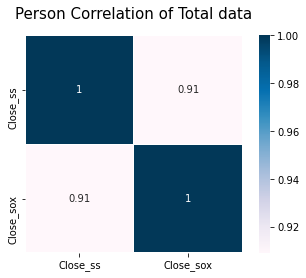

time: 238 ms


In [ ]:
colormap = plt.cm.PuBu
plt.figure(figsize=(6,4))
plt.title("Person Correlation of Total data", y = 1.05, size = 15)
sns.heatmap(cor_data[['Close_ss', 'Close_sox']].astype(float).corr(),
            linewidth = 0.1, vmax = 1.0,
            square = True, cmap = colormap,
            linecolor = 'white', annot = True)

In [ ]:
setidx_phlx.columns = ['Close_ph', 'Open_ph', 'High_ph', 'Low_ph', 'Volume_ph', 'Change_ph']

time: 2.29 ms


In [ ]:
corr_data = pd.merge(setidx_stock, setidx_phlx, left_index=True, right_index=True, how='outer')

time: 7.08 ms


In [ ]:
data_info(corr_data)

shape : (1424, 12)
dtypes : Open         float64
High         float64
Low          float64
Close        float64
Volume       float64
Change       float64
Close_ph     float64
Open_ph      float64
High_ph      float64
Low_ph       float64
Volume_ph     object
Change_ph     object
dtype: object


,Open,High,Low,Close,Volume,Change,Close_ph,Open_ph,High_ph,Low_ph,Volume_ph,Change_ph
Date,,,,,,,,,,,,
2015-01-02,26799.0,26799.0,26540.0,26600.0,175499.0,0.002261,686.73,690.28,694.03,680.28,-,-0.02%
2015-01-05,26720.0,26720.0,26260.0,26660.0,202790.0,0.002256,673.59,683.57,684.84,673.43,-,-1.91%
2015-01-06,26300.0,26340.0,25760.0,25900.0,304710.0,-0.028507,658.83,675.12,675.14,656.37,-,-2.19%
2015-01-07,25880.0,26220.0,25640.0,26140.0,286455.0,0.009266,665.27,660.42,668.22,658.75,-,0.98%
2015-01-08,26780.0,26780.0,26199.0,26280.0,289552.0,0.005356,684.65,671.81,686.20,671.81,-,2.91%


time: 41.9 ms


In [ ]:
corr_data.isnull().sum()

Open         77
High         77
Low          77
Close        77
Volume       77
Change       77
Close_ph     41
Open_ph      41
High_ph      41
Low_ph       41
Volume_ph    41
Change_ph    41
dtype: int64

time: 8.6 ms


In [ ]:
corr_data = corr_data.dropna(axis=0)

time: 6.15 ms


In [ ]:
data_info(corr_data)
corr_data.isnull().sum()

shape : (1306, 12)
dtypes : Open         float64
High         float64
Low          float64
Close        float64
Volume       float64
Change       float64
Close_ph     float64
Open_ph      float64
High_ph      float64
Low_ph       float64
Volume_ph     object
Change_ph     object
dtype: object


,Open,High,Low,Close,Volume,Change,Close_ph,Open_ph,High_ph,Low_ph,Volume_ph,Change_ph
Date,,,,,,,,,,,,
2015-01-02,26799.0,26799.0,26540.0,26600.0,175499.0,0.002261,686.73,690.28,694.03,680.28,-,-0.02%
2015-01-05,26720.0,26720.0,26260.0,26660.0,202790.0,0.002256,673.59,683.57,684.84,673.43,-,-1.91%
2015-01-06,26300.0,26340.0,25760.0,25900.0,304710.0,-0.028507,658.83,675.12,675.14,656.37,-,-2.19%
2015-01-07,25880.0,26220.0,25640.0,26140.0,286455.0,0.009266,665.27,660.42,668.22,658.75,-,0.98%
2015-01-08,26780.0,26780.0,26199.0,26280.0,289552.0,0.005356,684.65,671.81,686.20,671.81,-,2.91%


Open         0
High         0
Low          0
Close        0
Volume       0
Change       0
Close_ph     0
Open_ph      0
High_ph      0
Low_ph       0
Volume_ph    0
Change_ph    0
dtype: int64

time: 50.1 ms


In [ ]:
re = corr_data.corr(method='pearson')
print(re)

              Open      High       Low  ...   Open_ph   High_ph    Low_ph
Open      1.000000  0.999278  0.999354  ...  0.909351  0.907911  0.909632
High      0.999278  1.000000  0.999233  ...  0.910241  0.908978  0.910404
Low       0.999354  0.999233  1.000000  ...  0.908993  0.907415  0.909427
Close     0.998457  0.999300  0.999342  ...  0.909857  0.908407  0.910217
Volume    0.495615  0.502337  0.488091  ...  0.667404  0.676655  0.660450
Change   -0.008858  0.008839  0.008977  ...  0.006289  0.003828  0.008733
Close_ph  0.908445  0.909486  0.908178  ...  0.999007  0.999435  0.999499
Open_ph   0.909351  0.910241  0.908993  ...  1.000000  0.999588  0.999479
High_ph   0.907911  0.908978  0.907415  ...  0.999588  1.000000  0.999226
Low_ph    0.909632  0.910404  0.909427  ...  0.999479  0.999226  1.000000

[10 rows x 10 columns]
time: 24.8 ms


In [ ]:
corr = lambda p : p['Close'].corr(p['Close_ph'])
re_close =  corr(corr_data)

print(re_close)

0.909109515628923
time: 4.33 ms


In [ ]:
corr_data.tail()

,Open,High,Low,Close,Volume,Change,Close_ph,Open_ph,High_ph,Low_ph,Volume_ph,Change_ph
Date,,,,,,,,,,,,
2020-06-24,51900.0,53900.0,51600.0,52900.0,24519552.0,0.029183,1944.30,1976.63,1988.23,1930.69,-,-2.18%
2020-06-25,52100.0,53000.0,51900.0,51900.0,18541624.0,-0.018904,1961.05,1941.59,1963.72,1914.30,-,0.86%
2020-06-26,52800.0,53900.0,52200.0,53300.0,21575360.0,0.026975,1921.92,1959.50,1964.01,1917.83,-,-2.00%
2020-06-29,52500.0,53200.0,52000.0,52400.0,17776925.0,-0.016886,1943.90,1924.80,1944.64,1899.80,-,1.14%
2020-06-30,53900.0,53900.0,52800.0,52800.0,21157172.0,0.007634,1996.44,1954.54,2002.08,1953.22,-,2.70%


time: 35.2 ms


In [ ]:
corr_18 = corr_data.loc['2018-01-02':'2020-06-30']
corr_18.head()

,Open,High,Low,Close,Volume,Change,Close_ph,Open_ph,High_ph,Low_ph,Volume_ph,Change_ph
Date,,,,,,,,,,,,
2018-01-02,51380.0,51400.0,50780.0,51020.0,169485.0,0.001177,1287.70,1261.03,1287.74,1258.77,-,2.77%
2018-01-03,52540.0,52560.0,51420.0,51620.0,200270.0,0.011760,1309.86,1291.66,1310.37,1291.29,-,1.72%
2018-01-04,52120.0,52180.0,50640.0,51080.0,233909.0,-0.010461,1317.24,1315.27,1321.11,1306.37,-,0.56%
2018-01-05,51300.0,52120.0,51200.0,52120.0,189623.0,0.020360,1325.71,1321.17,1330.31,1316.13,-,0.64%
2018-01-08,52400.0,52520.0,51500.0,52020.0,167673.0,-0.001919,1335.54,1323.45,1339.37,1321.97,-,0.74%


time: 44.4 ms


In [ ]:
corr = lambda p : p['Close'].corr(p['Close_ph'])
re_close =  corr(corr_18)

print(re_close)

0.7736665462198971
time: 4.91 ms


In [ ]:
corr_19 = corr_data.loc['2019-01-02':'2020-06-30']
corr_19.head()

,Open,High,Low,Close,Volume,Change,Close_ph,Open_ph,High_ph,Low_ph,Volume_ph,Change_ph
Date,,,,,,,,,,,,
2019-01-02,39400.0,39400.0,38550.0,38750.0,7847664.0,0.001292,1165.30,1131.47,1173.52,1131.44,-,0.88%
2019-01-03,38300.0,38550.0,37450.0,37600.0,12471493.0,-0.029677,1096.03,1136.96,1142.92,1094.59,-,-5.94%
2019-01-04,37450.0,37600.0,36850.0,37450.0,14108958.0,-0.003989,1143.96,1114.48,1148.45,1111.79,-,4.37%
2019-01-07,38000.0,38900.0,37800.0,38750.0,12748997.0,0.034713,1166.24,1147.22,1176.75,1143.24,-,1.95%
2019-01-08,38000.0,39200.0,37950.0,38100.0,12756554.0,-0.016774,1160.55,1177.76,1177.82,1145.38,-,-0.49%


time: 35.3 ms


In [ ]:
corr = lambda p : p['Close'].corr(p['Close_ph'])
re_close =  corr(corr_19)

print(re_close)

0.8697582902581973
time: 4.9 ms
